In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy

In [2]:
# Load the data from the CSV into a DataFrame.
data_frame = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])
data_frame

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [3]:
# Extract numeric ratings from tweets that contain an “n/10” rating
data_frame['Rating'] = pd.to_numeric(data_frame['text'].str.extract(r'(\d+(\.\d+)?)/10')[0])

In [4]:
# Step 3: Remove outliers (ratings greater than 25)
data_frame = data_frame[data_frame['Rating'].notnull() & (data_frame['Rating'] <= 25)]
data_frame

,id,created_at,text,Rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [5]:
# Create a timestamp column by converting 'created_at' to timestamp
data_frame['timestamp'] = data_frame['created_at'].apply(lambda x: x.timestamp())

/var/folders/6d/9rdnxbn57mvdm90lxn41l1ch0000gn/T/ipykernel_79462/2574664075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['timestamp'] = data_frame['created_at'].apply(lambda x: x.timestamp())


In [6]:
# Linear regression to find the best-fit line
fit = scipy.stats.linregress(data_frame['timestamp'], data_frame['Rating'])
fit.slope, fit.intercept

(np.float64(3.515929974847722e-08), np.float64(-40.46415480898917))

In [7]:
# Add a 'prediction' column to the DataFrame
data_frame['prediction'] = data_frame['timestamp'] * fit.slope + fit.intercept
data_frame

/var/folders/6d/9rdnxbn57mvdm90lxn41l1ch0000gn/T/ipykernel_79462/2805735470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['prediction'] = data_frame['timestamp'] * fit.slope + fit.intercept


,id,created_at,text,Rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


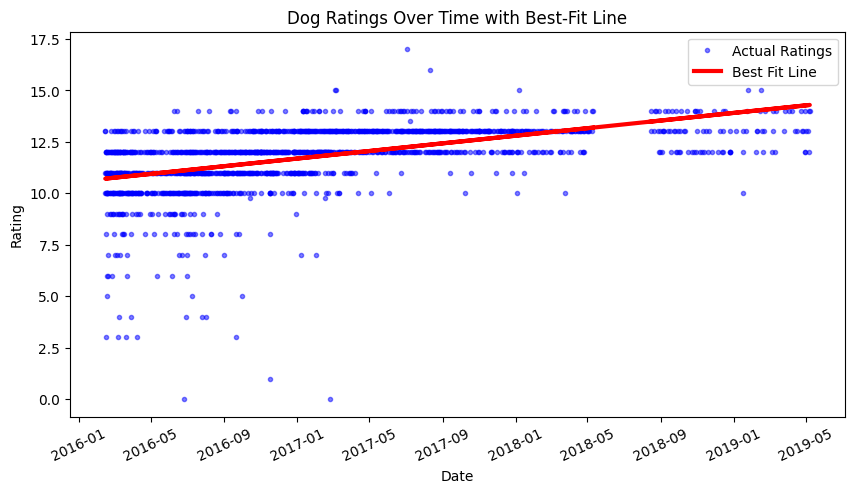

In [8]:
# Create a scatter plot of date vs rating, with the best-fit line
plt.figure(figsize=(10, 5))
plt.xticks(rotation=25)
plt.plot(data_frame['created_at'], data_frame['Rating'], 'b.', alpha=0.5, label='Actual Ratings')
plt.plot(data_frame['created_at'], data_frame['prediction'], 'r-', linewidth=3, label='Best Fit Line')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Dog Ratings Over Time with Best-Fit Line')
plt.legend()
plt.show()